In [16]:
# Import the necessary Libraries for the project
import warnings
import pandas as pd
import numpy as np
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# Machine Learning Model
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import accuracy_score, confusion_matrix


warnings.filterwarnings('ignore')


# Load the dataset into the variable 'data'
data = load_breast_cancer()

# Convert the data into a pandas Dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target


#### Splitting the data into 'train' and 'test'
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns="target").values, df.target.values, test_size=0.2, random_state=42)

# Converting the data into tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int16)
y_test = torch.tensor(y_test, dtype=torch.int16)


df_tf = torch.utils.data.TensorDataset(X_train, y_train)

train_loader = torch.utils.data.DataLoader(df_tf, batch_size=15, shuffle=True)

'''
The Model Entails;
 - input feature takes the shape of the training data.
 - 2 Hidden Layers with 15 neurons each.
 - output Layer with one neuron, having output labels 0 (benign tumor) and 1 (malignant tumor)
 - ReLu, a non linear activation function for the internal layers.
 - Sigmoid, a non linear activation function for the output layer, returning a probability between 0 and 1
'''
classifier = nn.Sequential(
    nn.Linear(in_features=X_train.shape[1], out_features=15),
    nn.ReLU(),
    nn.Linear(15,15),
    nn.ReLU(),
    nn.Linear(15,1),
    nn.Sigmoid()
)

# Defining the Loss function
criterion = nn.BCELoss()

# Defining the Optimizer
optimizer = optim.Adam(classifier.parameters(), lr=0.001, weight_decay=0.0001)

epochs = 1000
train_loss = []
train_acc = []
test_loss = []
test_acc = []

for epoch in range(epochs):
    optimizer.zero_grad()
    
    # Forward pass
    y_pred = classifier(X_train)
    loss = criterion(y_pred.squeeze(), y_train.float())
    
    # Backward pass
    loss.backward()
    optimizer.step()
    
    # Compute train accuracy and loss
    y_pred_train = classifier(X_train).detach().numpy()
    y_pred_train = np.where(y_pred_train > 0.5, 1, 0)
    acc_train = accuracy_score(y_train, y_pred_train)
    train_loss.append(loss.item())
    train_acc.append(acc_train)
    
    # Compute test accuracy and loss
    y_pred_test = classifier(X_test).detach().numpy()
    y_pred_test = np.where(y_pred_test > 0.5, 1, 0)
    acc_test = accuracy_score(y_test, y_pred_test)
    loss_test = criterion(torch.tensor(y_pred_test).float().squeeze(), y_test.float())
    test_loss.append(loss_test.item())
    test_acc.append(acc_test)
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Train Loss: {loss.item():.4f}, \
        Train Accuracy: {acc_train:.4f}, \
        Test Loss: {loss_test.item():.4f}, \
        Test Accuracy: {acc_test:.4f}")
        
        



In [2]:
# Load the dataset into the variable 'data'
data = load_breast_cancer()

In [3]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
# Convert the data into a pandas Dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
#basic descriptive statistics
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [7]:
# Checking for missing values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

##### Observation
There are no missing values and the datatypes of the different columns are correct

1    357
0    212
Name: target, dtype: int64


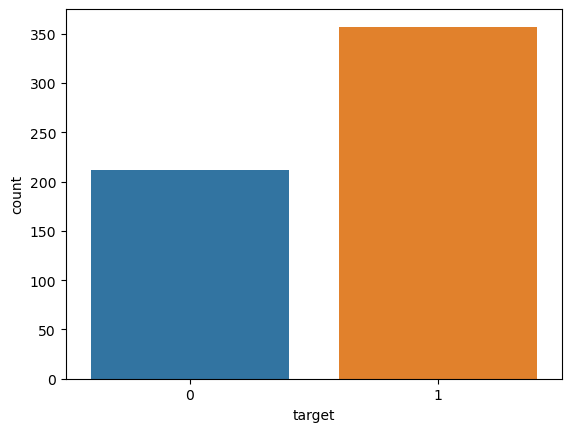

In [8]:
# Checking the count of malignant and bening tumors
print(df['target'].value_counts())

sns.countplot(df, x="target");

##### Observation
From the above Visualisation, there are 357 diagnoses of <b>benign tumors</b> and 212 of <b>malignant tumors</b>. The dataset is not perfectly balanced as we have more instances of malignant (357) than benign (212).

In [9]:
df.drop(columns="target").skew()

mean radius                0.942380
mean texture               0.650450
mean perimeter             0.990650
mean area                  1.645732
mean smoothness            0.456324
mean compactness           1.190123
mean concavity             1.401180
mean concave points        1.171180
mean symmetry              0.725609
mean fractal dimension     1.304489
radius error               3.088612
texture error              1.646444
perimeter error            3.443615
area error                 5.447186
smoothness error           2.314450
compactness error          1.902221
concavity error            5.110463
concave points error       1.444678
symmetry error             2.195133
fractal dimension error    3.923969
worst radius               1.103115
worst texture              0.498321
worst perimeter            1.128164
worst area                 1.859373
worst smoothness           0.415426
worst compactness          1.473555
worst concavity            1.150237
worst concave points       0

##### Observation
The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew.

From the graphs, we can see that radius_mean, perimeter_mean, area_mean, concavity_mean and concave_points_mean are useful in predicting cancer type due to the distinct grouping between malignant and benign cancer types in these features. We can also see that area_worst and perimeter_worst are also quite useful.

##### Correlation Check

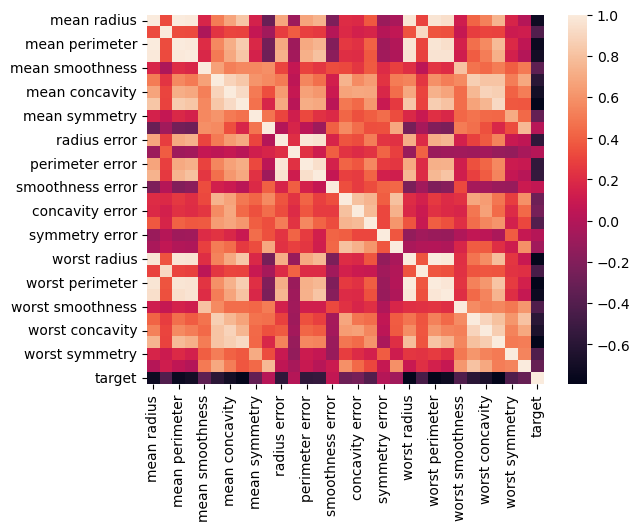

In [10]:
corr = df.corr()
sns.heatmap(corr)
plt.show();

##### Observation
From the heatmap, we can observe that some variables are highly correlated. For example, there is a high correlation between mean radius and mean perimeter, and between mean area and mean perimeter. We can further investigate the correlation among the variables using a scatter plot.

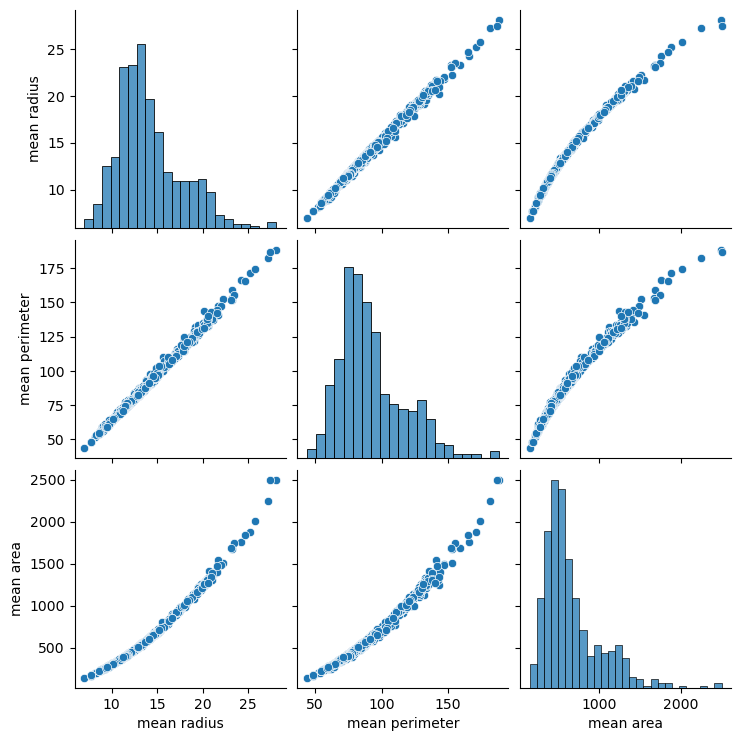

In [11]:
# Scatterplot 
sns.pairplot(df[['mean radius', 'mean perimeter', 'mean area']])
plt.show();

#### Checking for Outliers

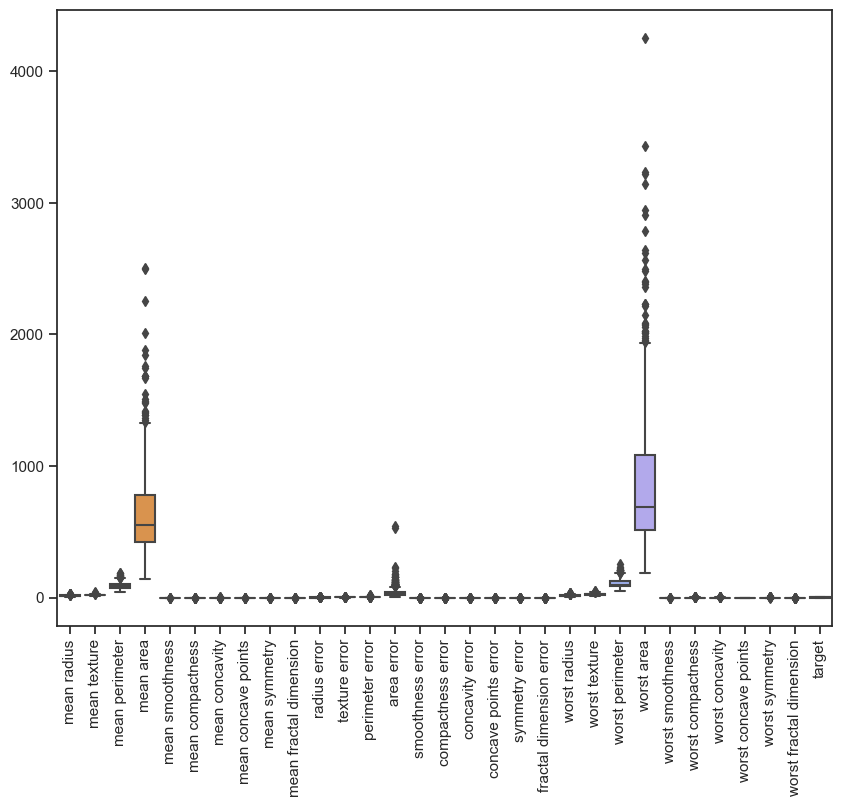

In [12]:
sns.set(style="ticks")
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

##### Observation
From the above plot, we can observe that the features "worst area", "mean area" have a huge number of outlier while "worst perimeter", "area error" and "mean perimeter" have low or moderate outliers

##### Feature Importance Using Correlation Coeficience


In [13]:
corr_matrix = df.corr().abs()
highest_corr_features = corr_matrix.index[corr_matrix['mean radius'] > 0.7]

print(highest_corr_features)

Index(['mean radius', 'mean perimeter', 'mean area', 'mean concave points',
       'area error', 'worst radius', 'worst perimeter', 'worst area',
       'worst concave points', 'target'],
      dtype='object')


##### Observation
 From the output above, there seems to be around 9 important features in the dataset that can influence the Target value

In [14]:
#### Splitting the data into 'train' and 'test'
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns="target").values, df.target.values, test_size=0.2, random_state=42)

In [17]:
# Converting the data into tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int16)
y_test = torch.tensor(y_test, dtype=torch.int16)

In [18]:
df_tf = torch.utils.data.TensorDataset(X_train, y_train)

In [19]:
train_loader = torch.utils.data.DataLoader(df_tf, batch_size=15, shuffle=True)

#### Note
-The train_loader loads the training data in batches.

### Model Building with Pytorch

In [20]:
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import accuracy_score, confusion_matrix

In [21]:
'''
The Model Entails;
 - input feature takes the shape of the training data.
 - 2 Hidden Layers with 15 neurons each.
 - output Layer with one neuron, having output labels 0 (benign tumor) and 1 (malignant tumor)
 - ReLu, a non linear activation function for the internal layers.
 - Sigmoid, a non linear activation function for the output layer, returning a probability between 0 and 1
'''
classifier = nn.Sequential(
    nn.Linear(in_features=X_train.shape[1], out_features=15),
    nn.ReLU(),
    nn.Linear(15,15),
    nn.ReLU(),
    nn.Linear(15,1),
    nn.Sigmoid()
)

In [22]:
# Defining the Loss function
criterion = nn.BCELoss()

# Defining the Optimizer
optimizer = optim.Adam(classifier.parameters(), lr=0.001, weight_decay=0.0001)

#### Model Training

In [23]:
epochs = 1000
train_loss = []
train_acc = []
test_loss = []
test_acc = []

#### Note
In the below code cell:<br>
<b>zero_grad()</b> sets the gradient to zero before the backpropagation process.<br>
<b>loss</b> computes the error in the calculations, comparing the predictions with the real data.<br>
<b>loss.backward()</b> is the backpropagation precess in the neural network to update the weights.<br>
<b>optimizer.step()</b> to update the weights

In [24]:
for epoch in range(epochs):
    optimizer.zero_grad()
    
    # Forward pass
    y_pred = classifier(X_train)
    loss = criterion(y_pred.squeeze(), y_train.float())
    
    # Backward pass
    loss.backward()
    optimizer.step()
    
    # Compute train accuracy and loss
    y_pred_train = classifier(X_train).detach().numpy()
    y_pred_train = np.where(y_pred_train > 0.5, 1, 0)
    acc_train = accuracy_score(y_train, y_pred_train)
    train_loss.append(loss.item())
    train_acc.append(acc_train)
    
    # Compute test accuracy and loss
    y_pred_test = classifier(X_test).detach().numpy()
    y_pred_test = np.where(y_pred_test > 0.5, 1, 0)
    acc_test = accuracy_score(y_test, y_pred_test)
    loss_test = criterion(torch.tensor(y_pred_test).float().squeeze(), y_test.float())
    test_loss.append(loss_test.item())
    test_acc.append(acc_test)
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Train Loss: {loss.item():.4f}, \
        Train Accuracy: {acc_train:.4f}, \
        Test Loss: {loss_test.item():.4f}, \
        Test Accuracy: {acc_test:.4f}")

Epoch 0, Train Loss: 4.5247,         Train Accuracy: 0.3714,         Test Loss: 62.2807,         Test Accuracy: 0.3772
Epoch 100, Train Loss: 0.2542,         Train Accuracy: 0.9033,         Test Loss: 7.0175,         Test Accuracy: 0.9298
Epoch 200, Train Loss: 0.2021,         Train Accuracy: 0.9165,         Test Loss: 2.6316,         Test Accuracy: 0.9737
Epoch 300, Train Loss: 0.1775,         Train Accuracy: 0.9297,         Test Loss: 4.3860,         Test Accuracy: 0.9561
Epoch 400, Train Loss: 0.1618,         Train Accuracy: 0.9385,         Test Loss: 5.2632,         Test Accuracy: 0.9474
Epoch 500, Train Loss: 0.1470,         Train Accuracy: 0.9429,         Test Loss: 4.3860,         Test Accuracy: 0.9561
Epoch 600, Train Loss: 0.1319,         Train Accuracy: 0.9429,         Test Loss: 4.3860,         Test Accuracy: 0.9561
Epoch 700, Train Loss: 0.1172,         Train Accuracy: 0.9560,         Test Loss: 4.3860,         Test Accuracy: 0.9561
Epoch 800, Train Loss: 0.1056,         Tr

#### Model Evaluation

In [25]:
y_pred_final = classifier(X_test).detach().numpy()
y_pred_final = np.where(y_pred_final > 0.5, 1, 0)
acc_final = accuracy_score(y_test, y_pred_final)
confusion_mat = confusion_matrix(y_test, y_pred_final)

print(f"Final Test Accuracy: {acc_final:.4f}")
print(f"Confusion Matrix:\n {confusion_mat}")

Final Test Accuracy: 0.9474
Confusion Matrix:
 [[38  5]
 [ 1 70]]


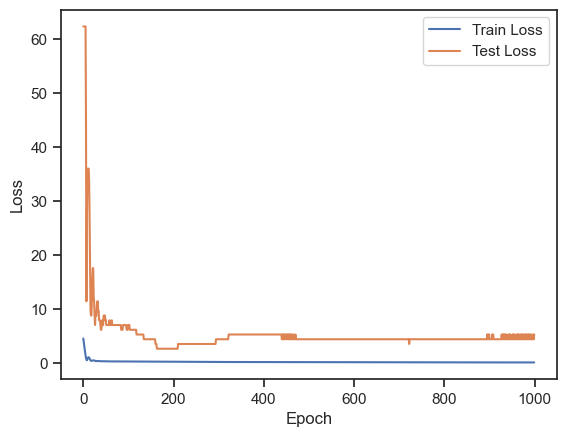

In [26]:
# Plot the graphs
plt.plot(train_loss, label="Train Loss")
plt.plot(test_loss, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


##### Observation
The test Loss was decreasing with increase in number of epoches

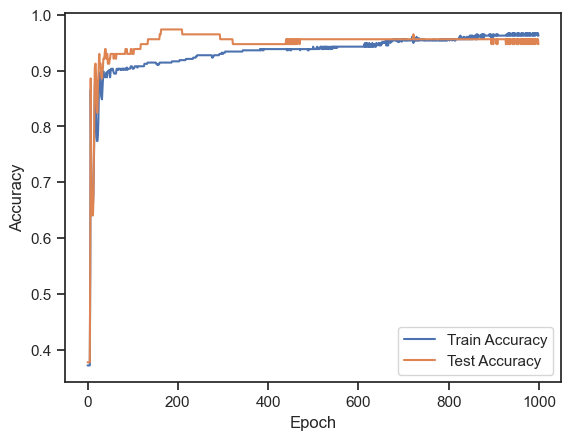

In [27]:
plt.plot(train_acc, label="Train Accuracy")
plt.plot(test_acc, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Observation
From the graph above, the Test accuracy was increasing during the first 180 epoches but started to slightly constant at epoches 400 onwards

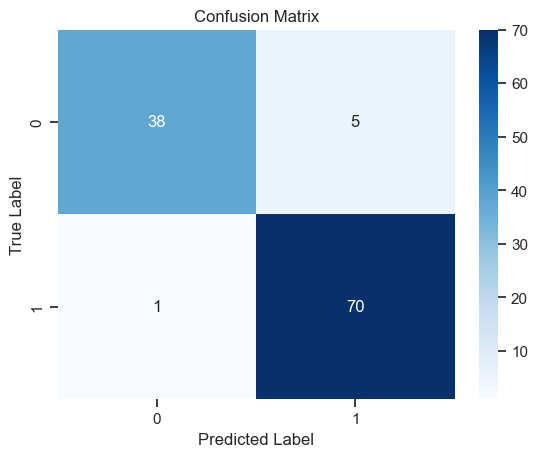

In [28]:
sns.heatmap(confusion_mat, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### Observation
From the above confusion matrix, the classifier made a total of 114 predictions, from which:<br>
    - 70 samples were correctly predicted as malignant tumors.<br>
    - 38 samples were correctly predicted as benign tumors.<br>
    - There were 5 samples estimated as false positive, these should have been classified as malignant tumors but were classified as benign.<br>
    - There was only 1 sample predicted as false negative.